In [12]:
import numpy as np
import math
import pandas as pd

from sklearn import svm
from sklearn import preprocessing
from sklearn.impute import SimpleImputer
from sklearn.metrics import roc_auc_score

from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.svm import LinearSVC
from sklearn.impute import KNNImputer

In [13]:
# init X
X= pd.read_csv("train_features.csv")

#init y
y = pd.read_csv("train_labels.csv")

In [14]:
X

,pid,Time,Age,EtCO2,PTT,BUN,Lactate,Temp,Hgb,HCO3,...,Alkalinephos,SpO2,Bilirubin_direct,Chloride,Hct,Heartrate,Bilirubin_total,TroponinI,ABPs,pH
0,1,3,34.0,NaN,NaN,12.0,NaN,36.0,8.7,24.0,...,NaN,100.0,NaN,114.0,24.6,94.0,NaN,NaN,142.0,7.33
1,1,4,34.0,NaN,NaN,NaN,NaN,36.0,NaN,NaN,...,NaN,100.0,NaN,NaN,NaN,99.0,NaN,NaN,125.0,7.33
2,1,5,34.0,NaN,NaN,NaN,NaN,36.0,NaN,NaN,...,NaN,100.0,NaN,NaN,NaN,92.0,NaN,NaN,110.0,7.37
3,1,6,34.0,NaN,NaN,NaN,NaN,37.0,NaN,NaN,...,NaN,100.0,NaN,NaN,NaN,88.0,NaN,NaN,104.0,7.37
4,1,7,34.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,100.0,NaN,NaN,22.4,81.0,NaN,NaN,100.0,7.41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227935,9999,8,85.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,80.0,NaN,NaN,110.0,NaN
227936,9999,9,85.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,83.0,NaN,NaN,123.0,NaN
227937,9999,10,85.0,NaN,NaN,NaN,NaN,36.0,NaN,NaN,...,NaN,98.0,NaN,NaN,NaN,80.0,NaN,NaN,138.0,NaN
227938,9999,11,85.0,NaN,NaN,NaN,NaN,NaN,10.2,NaN,...,NaN,98.0,NaN,NaN,31.0,75.0,NaN,NaN,125.0,NaN


In [15]:
X.iloc[0:12,:]

,pid,Time,Age,EtCO2,PTT,BUN,Lactate,Temp,Hgb,HCO3,...,Alkalinephos,SpO2,Bilirubin_direct,Chloride,Hct,Heartrate,Bilirubin_total,TroponinI,ABPs,pH
0,1,3,34.0,NaN,NaN,12.0,NaN,36.0,8.7,24.0,...,NaN,100.0,NaN,114.0,24.6,94.0,NaN,NaN,142.0,7.33
1,1,4,34.0,NaN,NaN,NaN,NaN,36.0,NaN,NaN,...,NaN,100.0,NaN,NaN,NaN,99.0,NaN,NaN,125.0,7.33
2,1,5,34.0,NaN,NaN,NaN,NaN,36.0,NaN,NaN,...,NaN,100.0,NaN,NaN,NaN,92.0,NaN,NaN,110.0,7.37
3,1,6,34.0,NaN,NaN,NaN,NaN,37.0,NaN,NaN,...,NaN,100.0,NaN,NaN,NaN,88.0,NaN,NaN,104.0,7.37
4,1,7,34.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,100.0,NaN,NaN,22.4,81.0,NaN,NaN,100.0,7.41
5,1,8,34.0,NaN,NaN,NaN,NaN,37.0,NaN,NaN,...,NaN,100.0,NaN,NaN,22.4,82.0,NaN,NaN,106.0,NaN
6,1,9,34.0,NaN,NaN,NaN,NaN,37.0,NaN,NaN,...,NaN,100.0,NaN,NaN,NaN,67.0,NaN,NaN,112.0,NaN
7,1,10,34.0,NaN,NaN,NaN,NaN,37.0,NaN,NaN,...,NaN,100.0,NaN,NaN,NaN,62.0,NaN,NaN,121.0,NaN
8,1,11,34.0,NaN,NaN,12.0,NaN,NaN,8.5,26.0,...,NaN,100.0,NaN,111.0,23.8,58.0,NaN,NaN,118.0,NaN
9,1,12,34.0,NaN,NaN,12.0,NaN,38.0,8.5,26.0,...,NaN,100.0,NaN,111.0,23.8,66.0,NaN,NaN,110.0,7.39


In [16]:
X_mean = (X.iloc[0:(12),:].mean(axis=0).fillna(0).to_frame().T)
X_mean

,pid,Time,Age,EtCO2,PTT,BUN,Lactate,Temp,Hgb,HCO3,...,Alkalinephos,SpO2,Bilirubin_direct,Chloride,Hct,Heartrate,Bilirubin_total,TroponinI,ABPs,pH
0,1.0,8.5,34.0,0.0,0.0,12.0,0.0,36.75,8.566667,25.333333,...,0.0,100.0,0.0,112.0,23.2,77.083333,0.0,0.0,114.5,7.37


In [17]:
#takes each set of 12 rows and makes the mean, NaN are ignored if there is at least 1 value in a column. 
#in the columns without any value the Nan is set to 0
#the rows are added together to form a new dataframe
#the for loop starts at 1 since the first row has been calculated before.

for i in range(1, int(len(X)/12)):
    X_mean = X_mean.append(X.iloc[i*12:(i*12+12),:].mean(axis=0).fillna(0).to_frame().T, ignore_index= False)

X_mean

,pid,Time,Age,EtCO2,PTT,BUN,Lactate,Temp,Hgb,HCO3,...,Alkalinephos,SpO2,Bilirubin_direct,Chloride,Hct,Heartrate,Bilirubin_total,TroponinI,ABPs,pH
0,1.0,8.5,34.0,0.000000,0.00,12.0,0.000,36.750000,8.566667,25.333333,...,0.0,100.000000,0.0,112.0,23.200000,77.083333,0.00,0.000,114.500000,7.3700
0,10.0,6.5,71.0,0.000000,27.80,12.0,0.000,36.000000,14.600000,0.000000,...,68.0,98.000000,0.0,0.0,42.100000,78.818182,1.30,0.010,132.909091,0.0000
0,100.0,7.5,68.0,0.000000,20.90,21.0,0.000,36.250000,12.500000,27.000000,...,0.0,96.500000,0.0,101.0,36.800000,109.083333,0.00,0.000,117.000000,0.0000
0,1000.0,6.5,79.0,31.863636,0.00,22.0,3.855,36.818182,9.200000,0.000000,...,0.0,98.818182,0.0,0.0,27.300000,86.363636,0.00,0.000,141.909091,7.3000
0,10000.0,6.5,76.0,0.000000,28.55,22.0,0.000,36.750000,10.700000,25.500000,...,0.0,98.545455,0.0,103.5,30.300000,77.090909,0.00,0.000,123.000000,7.3900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,9993.0,6.5,80.0,0.000000,0.00,13.5,0.000,35.750000,8.350000,0.000000,...,65.0,99.272727,0.0,0.0,26.150000,112.818182,0.55,10.680,99.636364,0.0000
0,9995.0,6.5,73.0,0.000000,55.50,50.0,0.000,36.000000,11.200000,29.000000,...,0.0,94.545455,0.0,89.0,35.600000,62.636364,0.00,0.000,180.181818,0.0000
0,9996.0,12.5,53.0,0.000000,0.00,0.0,0.000,37.400000,10.800000,0.000000,...,0.0,99.583333,0.0,0.0,30.033333,98.500000,0.00,0.000,99.250000,7.4025
0,9998.0,6.5,89.0,0.000000,34.70,13.0,0.000,36.636364,8.400000,0.000000,...,0.0,100.000000,0.0,0.0,25.600000,97.454545,0.00,1.505,131.545455,0.0000


In [36]:
X_val= X_mean

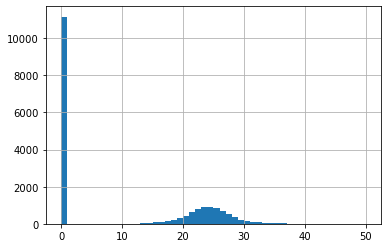

In [37]:
X_val.HCO3.hist(bins = 50);

In [38]:
scaler = preprocessing.StandardScaler().fit(X_val)
X_val = scaler.transform(X_val)
X_val

array([[-1.7250923 ,  0.46233857, -1.70642596, ..., -0.1010387 ,
        -0.21248411,  1.1715475 ],
       [-1.7241089 , -0.16008754,  0.54256564, ..., -0.09996704,
         0.49404032, -0.85238665],
       [-1.71427485,  0.15112552,  0.36021497, ..., -0.1010387 ,
        -0.11653635, -0.85238665],
       ...,
       [-0.63296652,  1.7071908 , -0.55153838, ..., -0.1010387 ,
        -0.79776546,  1.18047258],
       [-0.63274798, -0.16008754,  1.63666967, ...,  0.06024663,
         0.44170518, -0.85238665],
       [-0.63263872, -0.16008754,  1.39353544, ..., -0.1010387 ,
         0.30912281, -0.85238665]])

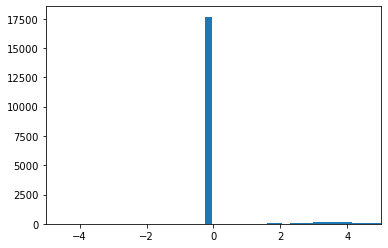

In [40]:
import matplotlib.pyplot as plt
plt.hist(X_val[:,3], bins=50)
plt.xlim(-5,5)
plt.show()

In [41]:
y

,pid,LABEL_BaseExcess,LABEL_Fibrinogen,LABEL_AST,LABEL_Alkalinephos,LABEL_Bilirubin_total,LABEL_Lactate,LABEL_TroponinI,LABEL_SaO2,LABEL_Bilirubin_direct,LABEL_EtCO2,LABEL_Sepsis,LABEL_RRate,LABEL_ABPm,LABEL_SpO2,LABEL_Heartrate
0,1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,12.1,85.4,100.0,59.9
1,10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17.8,100.6,95.5,85.5
2,100,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,16.5,88.3,96.5,108.1
3,1000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,19.4,77.2,98.3,80.9
4,10000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.6,76.8,97.7,95.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18990,9993,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,17.1,69.8,100.0,110.7
18991,9995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17.6,97.3,97.8,59.2
18992,9996,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,17.3,66.3,96.9,100.3
18993,9998,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,18.8,81.5,96.9,99.4


In [48]:
X_train=X_mean
y_train=y.values[:,1]
y_train

array([1., 0., 1., ..., 1., 0., 0.])

In [51]:
# Now the Linear Classification
linearsvm = LinearSVC(C=1, loss='hinge', max_iter=100000)
linearsvm.fit(X_train, y_train)

C:\Users\domin\.conda\envs\intro-ml\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(C=1, loss='hinge', max_iter=100000)